In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../2d_fixed_beta/2d_fixed_results.csv')
df.head()

,contamination_level,ctam_sigma,ctam_mu,cook_cutoff,ctam_rho,robust_m_est_bias,robust_m_est_variance,robust_m_est_mse,robust_mm_est_bias,robust_mm_est_variance,...,ols_est_variance,ols_est_mse,ols_diag_est_bias,ols_diag_est_variance,ols_diag_est_mse,ols_mspe,robust_m_mspe,robust_mm_mspe,robust_s_mspe,ols_diag_mspe
0,0.0,1,0,4,-1.0,0.000006,0.023982,0.023892,0.000005,0.024370,...,0.022812,0.022738,0.000012,0.029307,0.029202,1.083002,1.086698,1.087571,1.230377,1.098771
1,0.0,1,0,4,-0.8,0.000059,0.022059,0.022030,0.000076,0.022267,...,0.020232,0.020206,0.000044,0.027420,0.027354,1.054992,1.061288,1.062351,1.216254,1.079171
2,0.0,1,0,4,-0.6,0.000095,0.022385,0.022390,0.000084,0.022647,...,0.020782,0.020774,0.000045,0.029009,0.028939,1.087866,1.093817,1.095029,1.272977,1.107856
3,0.0,1,0,4,-0.4,0.000075,0.023518,0.023498,0.000094,0.024127,...,0.022350,0.022364,0.000117,0.027147,0.027156,1.079638,1.082904,1.084711,1.241236,1.094423
4,0.0,1,0,4,-0.2,0.000045,0.022471,0.022426,0.000044,0.023065,...,0.021703,0.021666,0.000075,0.028818,0.028777,1.061269,1.063476,1.064160,1.218222,1.078021


In [14]:
# n = 50, 100, 200, 500
n_list = [50, 100, 200, 500] 
df_len = len(df)
# df is missing the column n, first 7*5*9 rows are for n=50, next 7*5*9 rows are for n=100, etc.
df['n'] = np.repeat(n_list, df_len//len(n_list))
df.head()

,contamination_level,ctam_sigma,ctam_mu,cook_cutoff,ctam_rho,robust_m_est_bias,robust_m_est_variance,robust_m_est_mse,robust_mm_est_bias,robust_mm_est_variance,...,ols_est_mse,ols_diag_est_bias,ols_diag_est_variance,ols_diag_est_mse,ols_mspe,robust_m_mspe,robust_mm_mspe,robust_s_mspe,ols_diag_mspe,n
0,0.0,1,0,4,-1.0,0.000006,0.023982,0.023892,0.000005,0.024370,...,0.022738,0.000012,0.029307,0.029202,1.083002,1.086698,1.087571,1.230377,1.098771,50
1,0.0,1,0,4,-0.8,0.000059,0.022059,0.022030,0.000076,0.022267,...,0.020206,0.000044,0.027420,0.027354,1.054992,1.061288,1.062351,1.216254,1.079171,50
2,0.0,1,0,4,-0.6,0.000095,0.022385,0.022390,0.000084,0.022647,...,0.020774,0.000045,0.029009,0.028939,1.087866,1.093817,1.095029,1.272977,1.107856,50
3,0.0,1,0,4,-0.4,0.000075,0.023518,0.023498,0.000094,0.024127,...,0.022364,0.000117,0.027147,0.027156,1.079638,1.082904,1.084711,1.241236,1.094423,50
4,0.0,1,0,4,-0.2,0.000045,0.022471,0.022426,0.000044,0.023065,...,0.021666,0.000075,0.028818,0.028777,1.061269,1.063476,1.064160,1.218222,1.078021,50


In [15]:
df.columns

Index(['contamination_level', 'ctam_sigma', 'ctam_mu', 'cook_cutoff',
       'ctam_rho', 'robust_m_est_bias', 'robust_m_est_variance',
       'robust_m_est_mse', 'robust_mm_est_bias', 'robust_mm_est_variance',
       'robust_mm_est_mse', 'robust_s_est_bias', 'robust_s_est_variance',
       'robust_s_est_mse', 'ols_est_bias', 'ols_est_variance', 'ols_est_mse',
       'ols_diag_est_bias', 'ols_diag_est_variance', 'ols_diag_est_mse',
       'ols_mspe', 'robust_m_mspe', 'robust_mm_mspe', 'robust_s_mspe',
       'ols_diag_mspe', 'n'],
      dtype='object')

In [18]:
feature_columns = ['n','contamination_level', 'ctam_sigma', 'ctam_mu', 'cook_cutoff', 'ctam_rho']
mpse_columns = ['ols_mspe', 'robust_m_mspe', 'robust_mm_mspe', 'robust_s_mspe', 'ols_diag_mspe']
bias_columns = ['ols_est_bias', 'robust_m_est_bias', 'robust_mm_est_bias', 'robust_s_est_bias', 'ols_diag_est_bias']
variance_columns = ['ols_est_variance', 'robust_m_est_variance', 'robust_mm_est_variance', 'robust_s_est_variance', 'ols_diag_est_variance']
mse_columns = ['ols_est_mse', 'robust_m_est_mse', 'robust_mm_est_mse', 'robust_s_est_mse', 'ols_diag_est_mse']

In [19]:
# ploting for mpse, first melt the dataframe
df_mpse = df[feature_columns + mpse_columns]
df_mpse = df_mpse.melt(id_vars=feature_columns, value_vars=mpse_columns, var_name='method', value_name='mpse')
df_mpse['method'] = df_mpse['method'].str.replace('_mspe', '')
df_mpse.head()

,n,contamination_level,ctam_sigma,ctam_mu,cook_cutoff,ctam_rho,method,mpse
0,50,0.0,1,0,4,-1.0,ols,1.083002
1,50,0.0,1,0,4,-0.8,ols,1.054992
2,50,0.0,1,0,4,-0.6,ols,1.087866
3,50,0.0,1,0,4,-0.4,ols,1.079638
4,50,0.0,1,0,4,-0.2,ols,1.061269


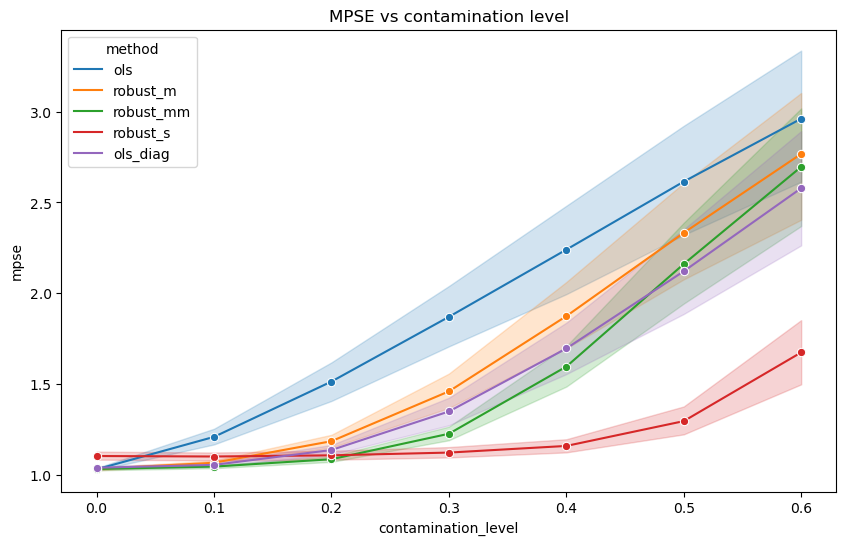

In [21]:
# plotting for mpse
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.lineplot(data=df_mpse, x='contamination_level', y='mpse', hue='method', marker='o', ax=ax)
plt.title('MPSE vs contamination level')
plt.show()

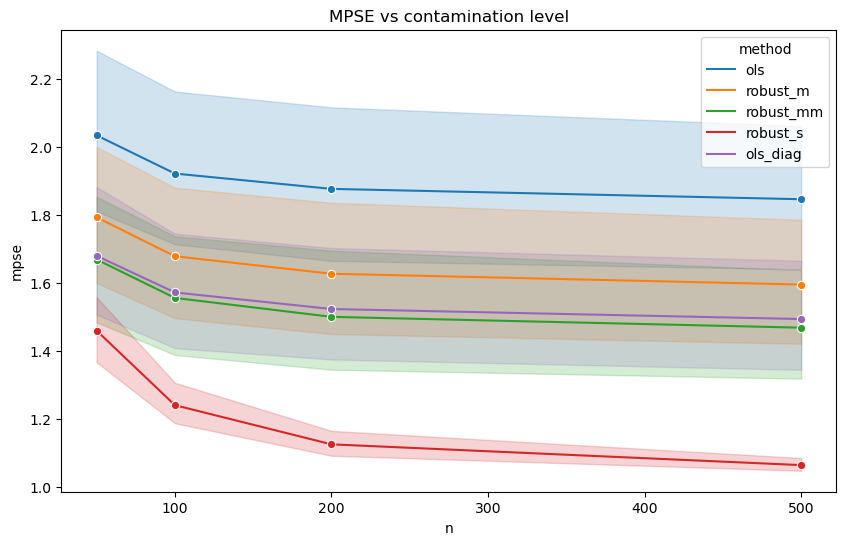

In [22]:
# plotting for mpse
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.lineplot(data=df_mpse, x='n', y='mpse', hue='method', marker='o', ax=ax)
plt.title('MPSE vs contamination level')
plt.show()

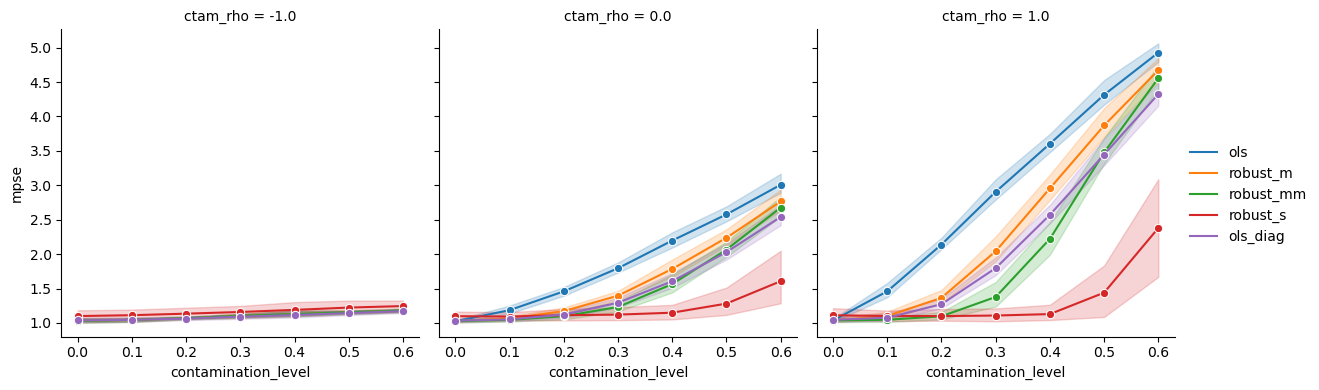

In [27]:
# facet by rho
df_mpse_3rho = df_mpse[df_mpse['ctam_rho'].isin([-1, 0, 1])]
g = sns.FacetGrid(df_mpse_3rho, col='ctam_rho', col_wrap=3, height=4, aspect=1)
g.map(sns.lineplot, 'contamination_level', 'mpse', 'method', marker='o')
g.add_legend()
plt.show()

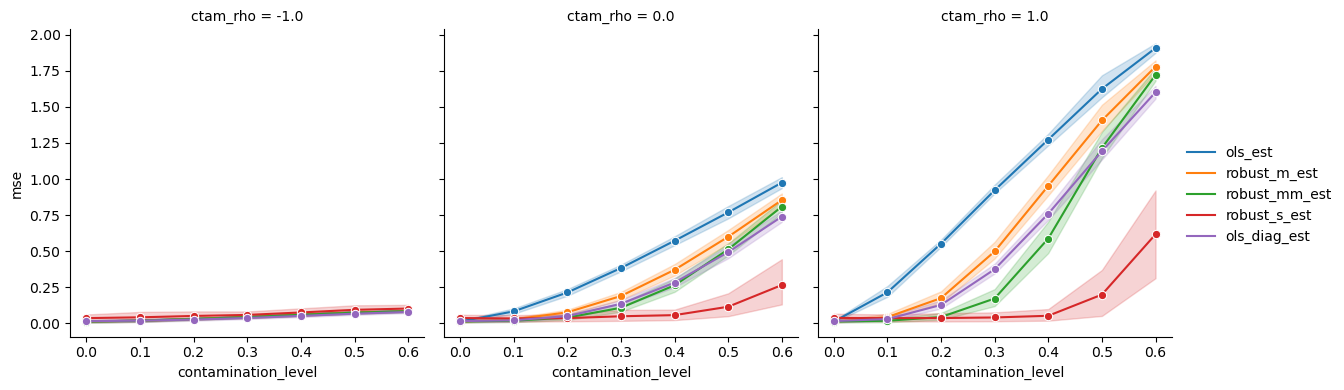

In [32]:
df_mse = df[feature_columns + mse_columns]
df_mse = df_mse.melt(id_vars=feature_columns, value_vars=mse_columns, var_name='method', value_name='mse')
df_mse['method'] = df_mse['method'].str.replace('_mse', '')

df_mse_3rho = df_mse[df_mse['ctam_rho'].isin([-1, 0, 1])]
g = sns.FacetGrid(df_mse_3rho, col='ctam_rho', col_wrap=3, height=4, aspect=1)
g.map(sns.lineplot, 'contamination_level', 'mse', 'method', marker='o')
g.add_legend()
plt.show()